In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

filename = '/storage/home/hcoda1/3/bxia34/scratch/train.h5'
with h5py.File(filename, 'r') as f:
    print(f.keys())
    brightness_temp = np.array(f['brightness_temp'])
    print("brightness_temp.shape =", brightness_temp.shape)
    print(f['kwargs'])
    kwargs = np.array(list(f['kwargs']))
    print("kwargs =")
    print(kwargs)
    print(f['params_seeds'])
    params_keys = list(f['params_seeds']['keys'])
    print("params.keys =", params_keys)
    params_values = np.array(list(f['params_seeds']['values']))
    seeds = params_values[:,-1]
    print("params.values =")
    print(params_values[:10,:])

<KeysViewHDF5 ['brightness_temp', 'kwargs', 'params_seeds']>
brightness_temp.shape = (64, 2, 64, 64, 64)
<HDF5 dataset "kwargs": shape (14, 2), type "|O">
kwargs =
[[b'num_images' b'32']
 [b'fields' b"['brightness_temp']"]
 [b'verbose' b'3']
 [b'seed' b'1']
 [b'strength' b'1']
 [b'redshift' b'[8, 10]']
 [b'HII_DIM' b'64']
 [b'BOX_LEN' b'100']
 [b'USE_INTERPOLATION_TABLES' b'True']
 [b'SIGMA_8' b'0.81']
 [b'hlittle' b'0.677']
 [b'OMm' b'0.31']
 [b'OMb' b'0.049']
 [b'POWER_INDEX' b'0.967']]
<HDF5 group "/params_seeds" (2 members)>
params.keys = [b'ION_Tvir_MIN', b'HII_EFF_FACTOR', b'seed']
params.values =
[[4.39381034e+00 4.61924836e+01 1.79109585e+09]
 [5.08468009e+00 2.40098482e+02 4.28287614e+09]
 [5.36894618e+00 1.83905663e+02 3.09377012e+09]
 [4.80306253e+00 1.68667328e+02 4.00530337e+09]
 [5.65799914e+00 8.24399874e+01 4.91264000e+05]
 [5.41719651e+00 1.66724708e+02 5.50290314e+08]
 [4.07697100e+00 2.34771575e+02 1.29850849e+09]
 [5.85406558e+00 7.58259022e+01 4.29084634e+09]
 [5.8

In [2]:
np.unique(seeds).shape

(16,)

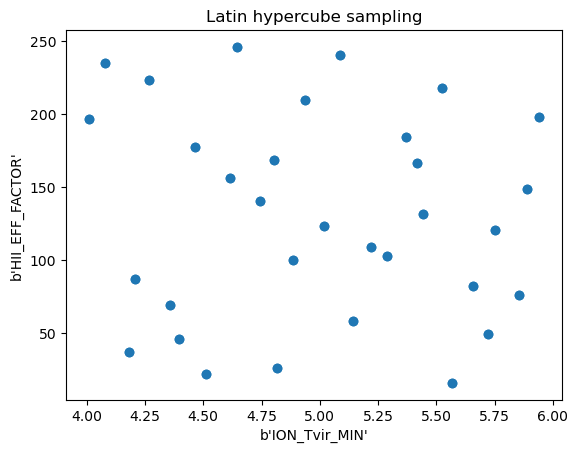

In [3]:
plt.scatter(params_values[:,0], params_values[:,1])
plt.xlabel(params_keys[0])
plt.ylabel(params_keys[1])
plt.title("Latin hypercube sampling")
plt.show()

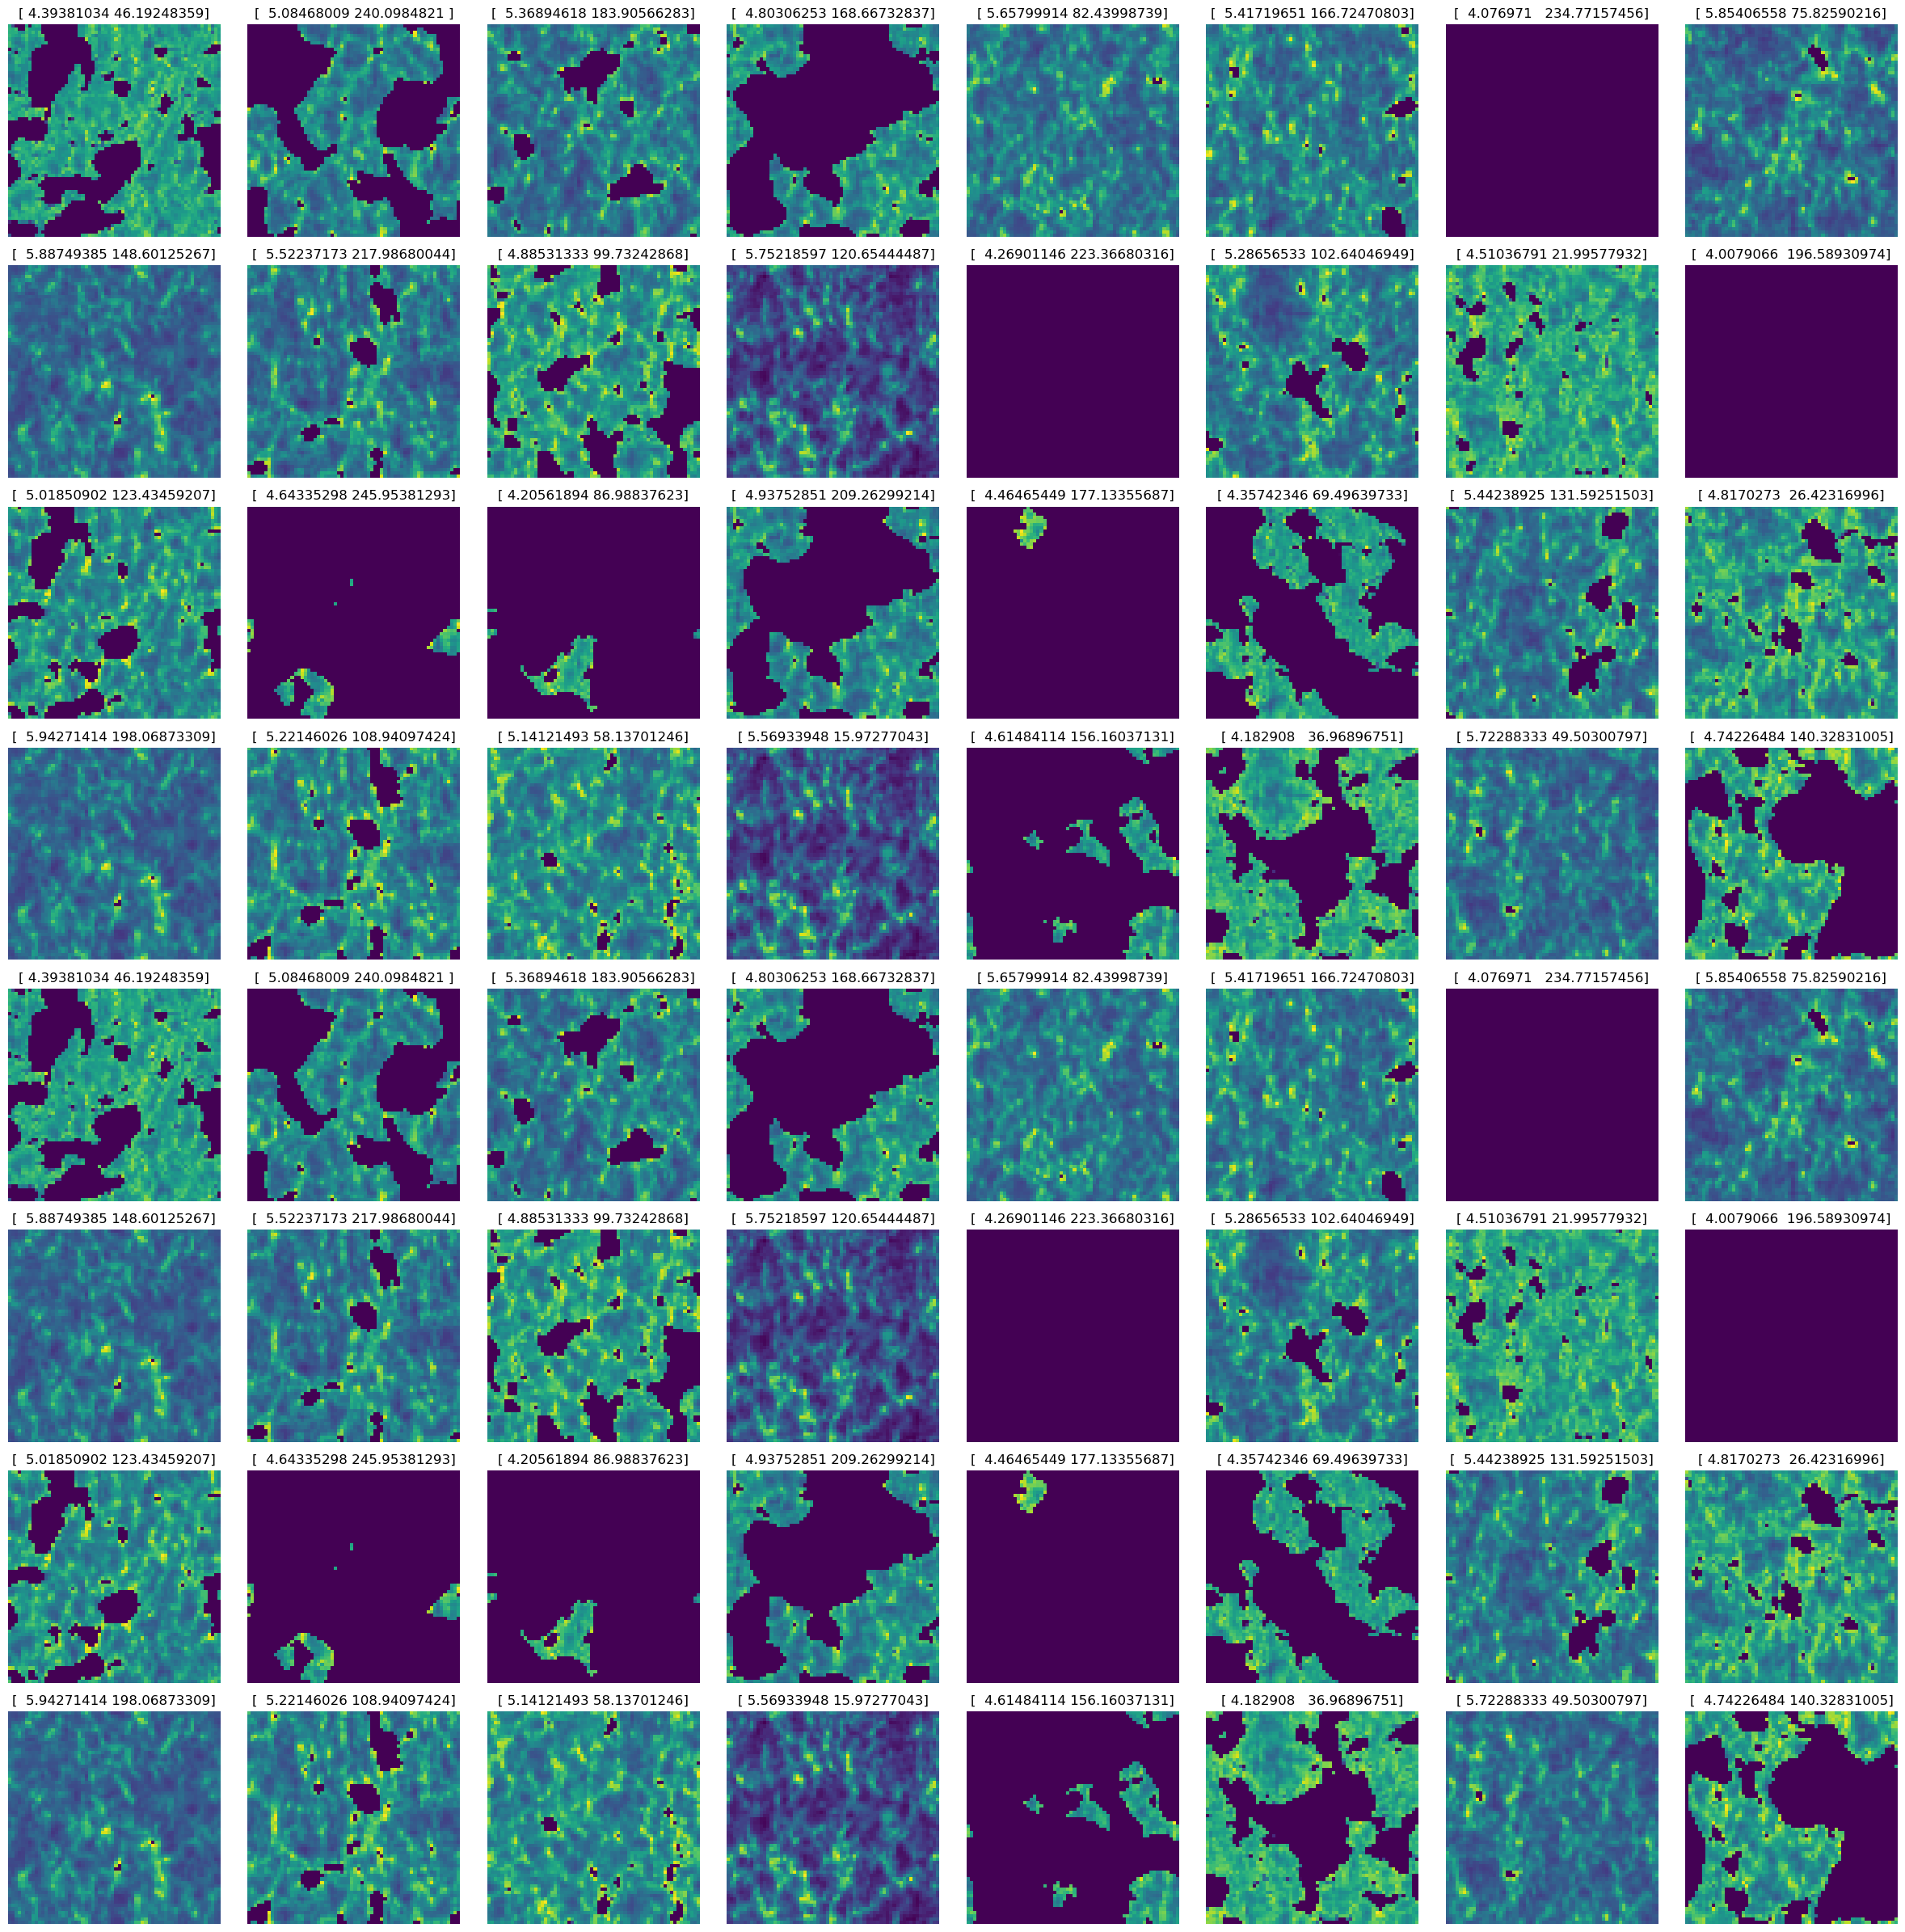

In [4]:
if __name__ == '__main__':
    fig, axes = plt.subplots(8,8, figsize=(24,24))
    for i, ax in enumerate(axes.flat):
        ax.imshow(brightness_temp[i][1][0])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.axis('off')
        ax.set_title(params_values[i][:2])
    # plt.margins(x=0, y=0)
    # plt.suptitle(params_keys)
    plt.tight_layout(w_pad=0.2)
    # plt.close()

In [7]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

filename = '/storage/home/hcoda1/3/bxia34/scratch/test.h5'
with h5py.File(filename, 'r') as f:
    print(f.keys())
    brightness_temp = np.array(f['brightness_temp'])
    print("brightness_temp.shape =", brightness_temp.shape)
    hires_density = np.array(f['hires_density'])
    print("hires_density.shape =", hires_density.shape)
    print(f['kwargs'])
    kwargs = np.array(list(f['kwargs']))
    print("kwargs =")
    print(kwargs)
    print(f['params_seeds'])
    params_keys = list(f['params_seeds']['keys'])
    print("params.keys =", params_keys)
    params_values = np.array(list(f['params_seeds']['values']))
    seeds = params_values[:,-1]
    print("params.values =")
    print(params_values)

<KeysViewHDF5 ['brightness_temp', 'hires_density', 'kwargs', 'params_seeds']>
brightness_temp.shape = (20, 1, 128, 128, 128)
hires_density.shape = (20, 1, 384, 384, 384)
<HDF5 dataset "kwargs": shape (14, 2), type "|O">
kwargs =
[[b'num_images' b'2']
 [b'fields' b"['brightness_temp', 'hires_density']"]
 [b'verbose' b'3']
 [b'seed' b'None']
 [b'strength' b'1']
 [b'redshift' b'[9]']
 [b'HII_DIM' b'128']
 [b'BOX_LEN' b'100']
 [b'USE_INTERPOLATION_TABLES' b'True']
 [b'SIGMA_8' b'0.81']
 [b'hlittle' b'0.677']
 [b'OMm' b'0.31']
 [b'OMb' b'0.049']
 [b'POWER_INDEX' b'0.967']]
<HDF5 group "/params_seeds" (2 members)>
params.keys = [b'ION_Tvir_MIN', b'HII_EFF_FACTOR', b'seed']
params.values =
[[4.40000000e+00 1.31341000e+02 3.70433023e+08]
 [4.40000000e+00 1.31341000e+02 7.65070240e+08]
 [5.60000000e+00 1.90370000e+01 2.17009104e+08]
 [5.60000000e+00 1.90370000e+01 1.92789435e+09]
 [4.69900000e+00 3.00000000e+01 1.30745737e+09]
 [4.69900000e+00 3.00000000e+01 2.23568091e+09]
 [5.47700000e+00 2.0

In [8]:
np.unique(seeds).shape

(20,)

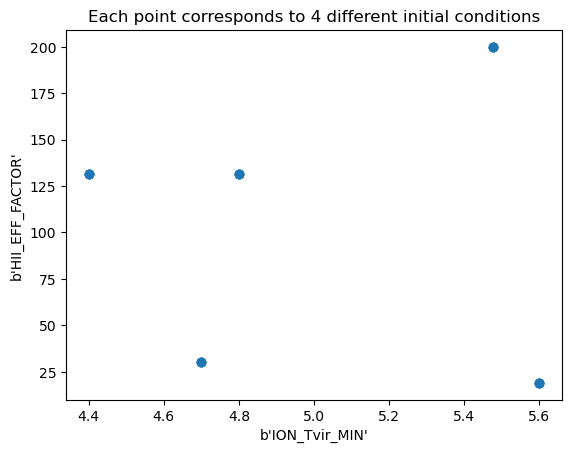

In [10]:
plt.scatter(params_values[:,0], params_values[:,1])
plt.xlabel(params_keys[0])
plt.ylabel(params_keys[1])
plt.title("Each point corresponds to 4 different initial conditions")
plt.show()

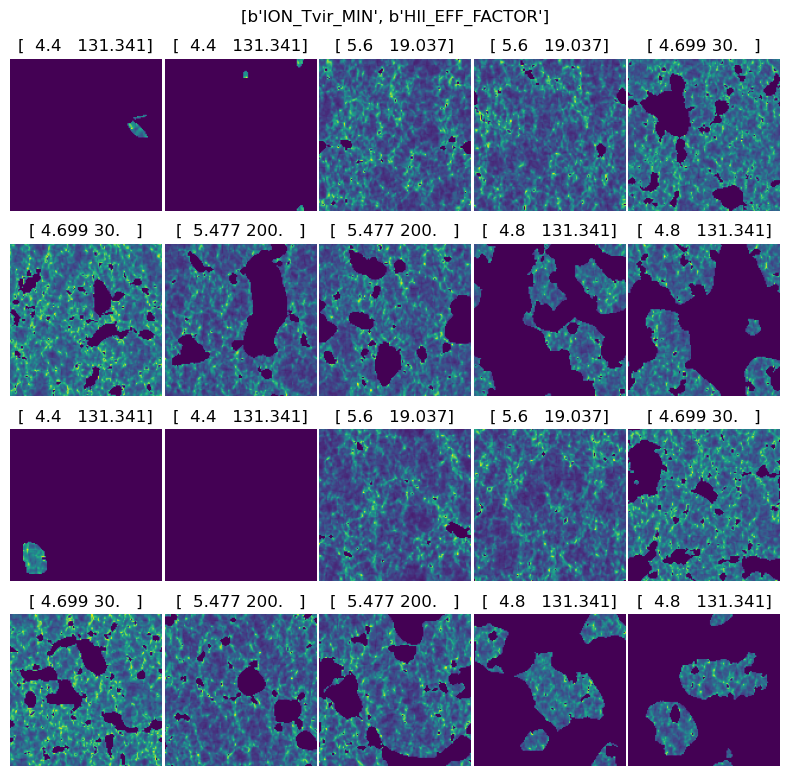

In [11]:
if __name__ == '__main__':
    fig, axes = plt.subplots(4,5, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(brightness_temp[i][0][0])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.axis('off')
        ax.set_title(params_values[i][:2])
    # plt.margins(x=0, y=0)
    # plt.suptitle(list(params_ranges.keys()))
    plt.suptitle(params_keys[:2])
    plt.tight_layout(w_pad=0.2)
    # plt.close()

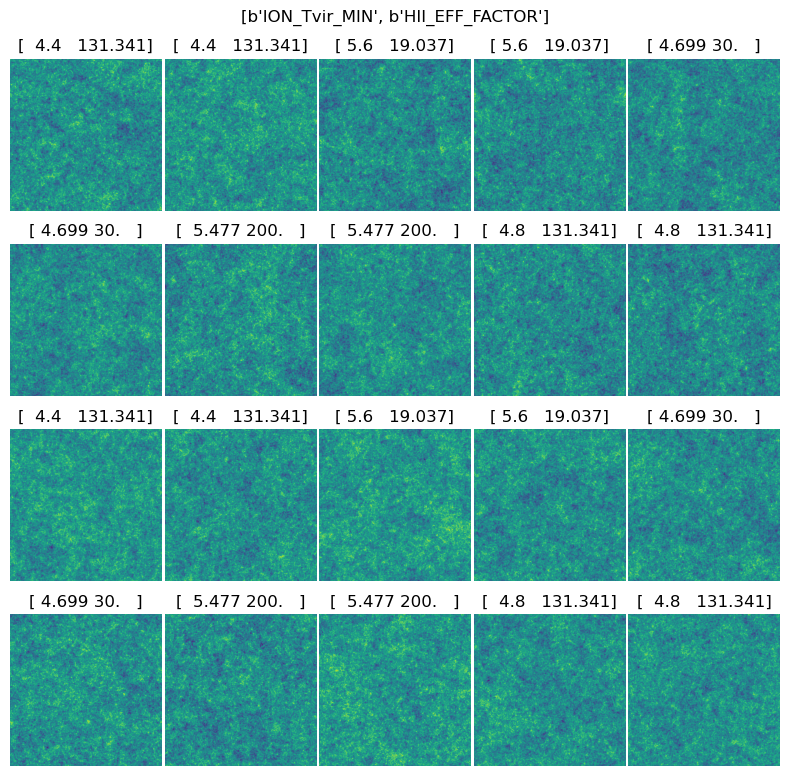

In [12]:
if __name__ == '__main__':
    fig, axes = plt.subplots(4,5, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(hires_density[i][0][0])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.axis('off')
        ax.set_title(params_values[i][:2])
    # plt.margins(x=0, y=0)
    plt.suptitle(params_keys[:2])
    plt.tight_layout(w_pad=0.2)
    # plt.close()